In [1]:
import numpy as np
import pandas as pd

### 加载数据集

In [2]:
def loadDataset(file):
    df = pd.read_csv(file,sep='\t',header=0,dtype=str,na_filter=False)
    return np.array(df).astype(np.float)

### Kmeans算法实现细节

In [3]:
class KMeansCluster():
    def __init__(self,k=3,initCent='random',max_iter=500):
        self._k = k
        self._initCent = initCent
        self._max_iter = max_iter
        self._clusterAssment = None
        self._labels = None
    #计算欧式距离  
    def _calEDist(self,arrA,arrB):
        return np.math.sqrt(sum(np.power(arrA - arrB, 2)))
    #随机选择K个中心点
    def _randCent(self,data_X,k):
        n = data_X.shape[1]
        centroids = np.empty((k,n))
        for j in range(n):
            minJ = min(data_X[:,j])
            rangeJ = float(max(data_X[:,j]-minJ))
            centroids[:,j] = (minJ+rangeJ*np.random.rand(k,1)).flatten()
        return centroids
    #更新聚类中心点直到收敛
    def fit(self,data_X):
        if not isinstance(data_X,np.ndarray) or isinstance(data_X,np.matrixlib.defmatrix.matrix):
            try:
                data_X = np.asarray(data_X)
            except:
                raise TypeError('numpy.darray resuird for data_X')
        m = data_X.shape[0]
        #一个m*2的二维矩阵，矩阵第一列存储样本点所属的族的索引值，
        #第二列存储该点与所属族的质心的平方差
        self._clusterAssment = np.zeros((m,2))
        
        if self._initCent == 'random':
            self._centroids = self._randCent(data_X,self._k)
        
        clusterChanged = True
        for _ in range(self._max_iter):
            clusterChanged = False
            for i in range(m):#将每个样本点分配到离它最近的质心所属的族
                minDist = np.inf #首先将其置为无穷大的数
                minIndex = -1 #将最近的质心点下标置为-1
                for j in range(self._k):
                    arrA = self._centroids[j,:]
                    arrB = data_X[i,:]
                    distJI = self._calEDist(arrA,arrB)
                    if distJI<minDist:
                        minDist = distJI
                        minIndex = j
                if self._clusterAssment[i,0]!=minIndex or self._clusterAssment[i,1]>minDist**2:
                    clusterChanged = True 
                    self._clusterAssment[i,:]=minIndex,minDist**2
            if not clusterChanged:
                break
            for i in range(self._k):
                index_all = self._clusterAssment[:,0]
                value = np.nonzero(index_all == i)
                ptsInClust = data_X[value[0]]
                self._centroids[i,:]=np.mean(ptsInClust,axis=0)
        self._labels =self._clusterAssment[:,0]

In [4]:
data_X = loadDataset(r'data.txt')

In [5]:
k=4
clf = KMeansCluster(k)
clf.fit(data_X)

### 结果可视化

In [6]:
import matplotlib.pyplot as plt

In [7]:
cents = clf._centroids
labels = clf._labels
colors = ['b','g','r','k','c','m','y','#e24fff','#524c90','#845868']

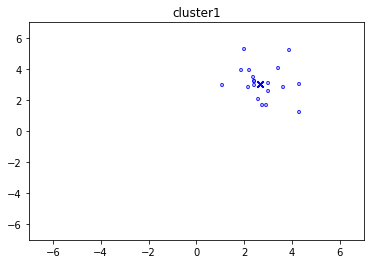

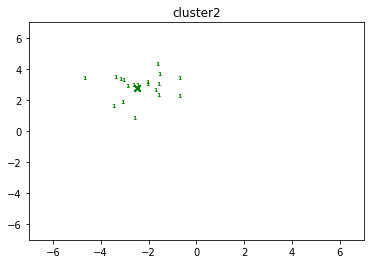

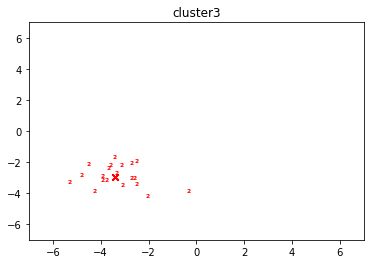

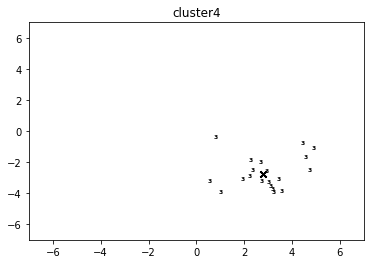

In [35]:
for i in range(k):
    index = np.nonzero(labels == i)[0]
    x0 = data_X[index,0]
    x1 = data_X[index,1]
    y_i = i
    for j in range(len(x0)):
        plt.title('cluster{}'.format(i+1))
        plt.text(x0[j],x1[j],str(y_i),color = colors[i],fontdict={'weight':'bold','size':6})
        plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=7)
        plt.axis([-7,7,-7,7])
    plt.show()

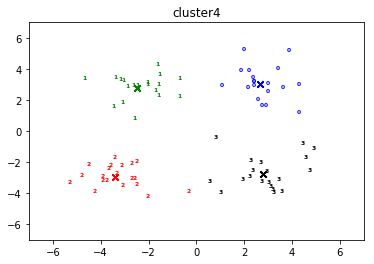

In [36]:
for i in range(k):
    index = np.nonzero(labels == i)[0]
    x0 = data_X[index,0]
    x1 = data_X[index,1]
    y_i = i
    for j in range(len(x0)):
        plt.title('cluster{}'.format(i+1))
        plt.text(x0[j],x1[j],str(y_i),color = colors[i],fontdict={'weight':'bold','size':6})
        plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=7)
        plt.axis([-7,7,-7,7])
plt.show()

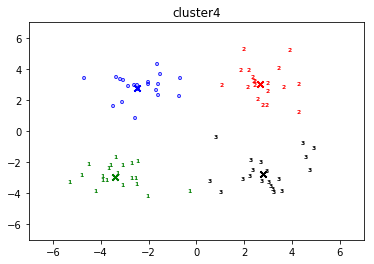

In [8]:
for i in range(k):
    index = np.nonzero(labels == i)[0]
    x0 = data_X[index,0]
    x1 = data_X[index,1]
    y_i = i
    for j in range(len(x0)):
        plt.title('cluster{}'.format(i+1))
        plt.text(x0[j],x1[j],str(y_i),color = colors[i],fontdict={'weight':'bold','size':6})
        plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=7)
        plt.axis([-7,7,-7,7])
plt.show()